## Objective
The objective of this assignment is to independently develop a classification model for each of the two provided datasets. You will experiment with three different algorithms (excluding transformers) and analyze their performance

Contains titles, abstracts, and topic labels of research articles. Your task is
to predict the topic based on the title and abstract. 

what algorithms i can use for the label based classification.

- multiclass classification algorithm
  - naive bayes
  - Logistic Regression utilising softmax (optional)
  - SVMs
  - LSTM

In [ ]:
pip install openpyxl nltk tensorflow torchtext

## Data Preparation and the Feature Engineering

- Reading the dataset from the csv file.
- Splitting the data into train,test using 80% for train and 20% for test.
- Why TF-IDF
  - Captures the co-occurrence of the words, ensures commonly occurring words in a document are accounted for and idf accounts for the occurrence of the words across the documents.

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_excel("Dataset-1.xlsx")
print(df)
df.info()

df['text'] = df['TITLE'] + ' ' + df['ABSTRACT']
X = df['text']
labels =['Computer Science','Physics','Mathematics','Statistics','Quantitative Biology','Quantitative Finance']
y = df[labels]

# feature engineering
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

          ID                                              TITLE  \
0          1        Reconstructing Subject-Specific Effect Maps   
1          2                 Rotation Invariance Neural Network   
2          3  Spherical polyharmonics and Poisson kernels fo...   
3          4  A finite element approximation for the stochas...   
4          5  Comparative study of Discrete Wavelet Transfor...   
...      ...                                                ...   
20967  20968  Contemporary machine learning: a guide for pra...   
20968  20969  Uniform diamond coatings on WC-Co hard alloy c...   
20969  20970  Analysing Soccer Games with Clustering and Con...   
20970  20971  On the Efficient Simulation of the Left-Tail o...   
20971  20972   Why optional stopping is a problem for Bayesians   

                                                ABSTRACT  Computer Science  \
0        Predictive models allow subject-specific inf...                 1   
1        Rotation invariance and transl

## Algo1 Naive Bayes Implementation
- MultiOutputClassifier to handle multi-label classification by applying the base Naive Bayes classifier independently to each label. Each label is treated as a separate binary classification problem.
- Smoothing Parameter(alpha=0.1) that prevents zero probabilities for unseen features.
- classification_report provides metrics like precision, recall, F1-score, and support for each label.
  

In [80]:

nb = MultinomialNB(alpha=0.1)
multi_target_nb = MultiOutputClassifier(nb)
multi_target_nb.fit(X_tfidf,y_train)

y_pred = multi_target_nb.predict(X_test_tfidf)
print(classification_report(y_test,y_pred))
print(" accuracy score is ", accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1692
           1       0.93      0.82      0.87      1226
           2       0.83      0.76      0.79      1150
           3       0.73      0.80      0.76      1069
           4       0.70      0.19      0.30       122
           5       0.86      0.27      0.41        45

   micro avg       0.81      0.80      0.80      5304
   macro avg       0.80      0.62      0.66      5304
weighted avg       0.81      0.80      0.80      5304
 samples avg       0.80      0.83      0.80      5304

 accuracy score is  0.6317044100119189


C:\Users\pantm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## SVM Implementation
- MultiOutputClassifier enables multi-label classification by applying the base classifier (SVC) independently to each label.
- kernel='linear': suitable for linearly separable data.
- probability=True: estimate probabilities for classification, though it increases computation time

In [30]:
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

svm = SVC(kernel='linear',probability=True)
multi_svm = MultiOutputClassifier(svm)
multi_svm.fit(X_tfidf,y_train)
y_pred = multi_svm.predict(X_test_tfidf)
accuracy = accuracy_score(y_pred,y_test)
print(" accuracy score is ", accuracy)
print(classification_report(y_test,y_pred))


 accuracy score is  0.6541120381406437
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      1692
           1       0.92      0.84      0.88      1226
           2       0.85      0.75      0.80      1150
           3       0.80      0.71      0.75      1069
           4       0.67      0.20      0.30       122
           5       0.94      0.36      0.52        45

   micro avg       0.84      0.78      0.81      5304
   macro avg       0.83      0.62      0.68      5304
weighted avg       0.84      0.78      0.80      5304
 samples avg       0.82      0.81      0.80      5304



C:\Users\pantm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## LSTM Implementation

Multi-label classification LSTM model using PyTorch.

1. Data Preparation:
   - processes text data by combining title and abstract fields
   - Used Keras' Tokenizer and pads sequence to a fixed length(50)
   - Labels are extracted from 6 target columns: Computer Science, Physics, Mathematics, Statistics, Quantitative Biology, and Quantitative Finance

2. Word Embeddings:
   - Used pre-trained GloVe embeddings (100-dimensional vectors)
   - Created an embedding matrix for the vocabulary in the dataset

3. Model Architecture:
   - Bidirectional LSTM with pre-trained GloVe embeddings (frozen during training)
   - Hidden dimension = 128
   - Dropout (0.3) for regularization
   - Final sigmoid activation for multi-label classification

4. Training Process:
   - Binary Cross-Entropy Loss (multi-label classification)
   - Adam optimizer with learning rate 0.001
   - Trained for 10 epochs, batch size=32

5. Evaluation:
   - threshold of 0.5 on sigmoid outputs to determine +ve predictions
   - classification report with the 6 target categories

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
#data['text'] = data['TITLE'] + " " + data['ABSTRACT']
def load_embeddings(glove_path):
    embeddings = {}
    with open(glove_path, encoding='utf-8') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    print(f"Loaded {len(embeddings)} word vectors.")
    return embeddings

categories = ['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']
label_data = df[categories].values

text_tokenizer = Tokenizer(num_words=10000)
text_tokenizer.fit_on_texts(df['text'])
text_sequences = text_tokenizer.texts_to_sequences(df['text'])

sequence_length = 50
input_data = pad_sequences(text_sequences, maxlen=sequence_length)

glove_path = "../glove.6B/glove.6B.100d.txt"
embedding_size = 100
vocab_size = len(text_tokenizer.word_index) + 1
embedding_weights = np.zeros((vocab_size, embedding_size))
glove_embeddings = load_embeddings(glove_path)

for word, index in text_tokenizer.word_index.items():
    embed_vector = glove_embeddings.get(word)
    if embed_vector is not None:
        embedding_weights[index] = embed_vector

input_tensors = torch.tensor(input_data, dtype=torch.long)
label_tensors = torch.tensor(label_data, dtype=torch.float32)

train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    input_tensors.numpy(), label_tensors.numpy(), test_size=0.2, random_state=42
)

Loaded 400000 word vectors.


Epoch 1/10, Train Loss: 0.3412, Train Acc: 0.8492, Test Loss: 0.2835, Test Acc: 0.8750
Epoch 2/10, Train Loss: 0.2754, Train Acc: 0.8826, Test Loss: 0.2651, Test Acc: 0.8889
Epoch 3/10, Train Loss: 0.2555, Train Acc: 0.8932, Test Loss: 0.2531, Test Acc: 0.8936
Epoch 4/10, Train Loss: 0.2420, Train Acc: 0.8986, Test Loss: 0.2495, Test Acc: 0.8962
Epoch 5/10, Train Loss: 0.2287, Train Acc: 0.9053, Test Loss: 0.2450, Test Acc: 0.8975
Epoch 6/10, Train Loss: 0.2147, Train Acc: 0.9112, Test Loss: 0.2427, Test Acc: 0.8991
Epoch 7/10, Train Loss: 0.1994, Train Acc: 0.9183, Test Loss: 0.2505, Test Acc: 0.8975
Epoch 8/10, Train Loss: 0.1819, Train Acc: 0.9255, Test Loss: 0.2681, Test Acc: 0.8962
Epoch 9/10, Train Loss: 0.1636, Train Acc: 0.9336, Test Loss: 0.2697, Test Acc: 0.8977
Epoch 10/10, Train Loss: 0.1428, Train Acc: 0.9413, Test Loss: 0.3037, Test Acc: 0.8920


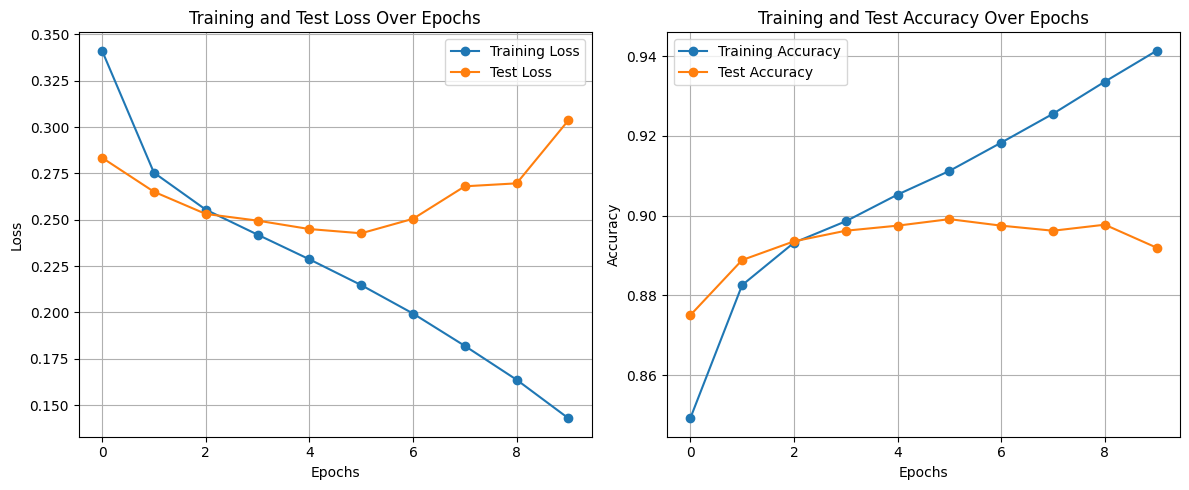

                      precision    recall  f1-score   support

    Computer Science       0.77      0.80      0.78      1692
             Physics       0.77      0.84      0.80      1226
         Mathematics       0.82      0.68      0.75      1150
          Statistics       0.73      0.45      0.56      1069
Quantitative Biology       0.42      0.17      0.24       122
Quantitative Finance       0.57      0.27      0.36        45

           micro avg       0.77      0.69      0.73      5304
           macro avg       0.68      0.53      0.58      5304
        weighted avg       0.76      0.69      0.72      5304
         samples avg       0.78      0.74      0.74      5304



C:\Users\pantm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, inputs, labels):
        self.inputs = inputs
        self.labels = labels
    def __len__(self):
        return len(self.inputs)
    def __getitem__(self, index):
        return self.inputs[index], self.labels[index]

train_set = CustomDataset(train_inputs, train_labels)
test_set = CustomDataset(test_inputs, test_labels)
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32)

class BiLSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_size, hidden_size, output_size, embedding_weights):
        super(BiLSTMModel, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_size)
        self.embeddings.weight = nn.Parameter(torch.tensor(embedding_weights, dtype=torch.float))
        self.embeddings.weight.requires_grad = False
        
        self.lstm = nn.LSTM(embedding_size, hidden_size, batch_first=True, bidirectional=True)
        self.dense1 = nn.Linear(hidden_size * 2, hidden_size)
        self.dropout = nn.Dropout(0.3)
        self.dense2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        embed = self.embeddings(x)
        _ , (hidden, cell) = self.lstm(embed)
        hidden_concat = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        dense_out = self.dense1(hidden_concat)
        relu_out = torch.relu(dense_out)
        dropout_out = self.dropout(relu_out)
        output = self.dense2(dropout_out)
        return torch.sigmoid(output)

hidden_size = 128
output_size = len(categories)  
model = BiLSTMModel(vocab_size, embedding_size, hidden_size, output_size, embedding_weights)

loss_function = nn.BCELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)

epochs = 10
train_loss_values = []
test_loss_values = []
train_accuracy_values = []
test_accuracy_values = []

for epoch in range(epochs):
    model.train()
    train_loss_sum = 0
    correct_predictions = 0
    total_elements = 0
    
    for batch_inputs, batch_labels in train_loader:
        optim.zero_grad()
        batch_outputs = model(batch_inputs)
        batch_loss = loss_function(batch_outputs, batch_labels)
        batch_loss.backward()
        optim.step()
        
        train_loss_sum += batch_loss.item()
        batch_predictions = (batch_outputs > 0.5).float()
        correct_predictions += (batch_predictions == batch_labels).sum().item()
        total_elements += batch_labels.numel()
    
    train_loss = train_loss_sum / len(train_loader)
    train_accuracy = correct_predictions / total_elements
    train_loss_values.append(train_loss)
    train_accuracy_values.append(train_accuracy)
    
    model.eval()
    test_loss_sum = 0
    test_correct_predictions = 0
    test_total_elements = 0
    
    with torch.no_grad():
        for batch_inputs, batch_labels in test_loader:
            batch_outputs = model(batch_inputs)
            batch_loss = loss_function(batch_outputs, batch_labels)
            test_loss_sum += batch_loss.item()
            batch_predictions = (batch_outputs > 0.5).float()
            test_correct_predictions += (batch_predictions == batch_labels).sum().item()
            test_total_elements += batch_labels.numel()
    
    test_loss = test_loss_sum / len(test_loader)
    test_accuracy = test_correct_predictions / test_total_elements
    test_loss_values.append(test_loss)
    test_accuracy_values.append(test_accuracy)
    
    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.4f}')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), train_loss_values, 'o-', label='Training Loss')
plt.plot(range(epochs), test_loss_values, 'o-', label='Test Loss')
plt.title('Loss Per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), train_accuracy_values, 'o-', label='Training Accuracy')
plt.plot(range(epochs), test_accuracy_values, 'o-', label='Test Accuracy')
plt.title('Accuracy Per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

model.eval()
all_predictions = []
all_ground_truths = []

with torch.no_grad():
    for batch_inputs, batch_labels in test_loader:
        batch_outputs = model(batch_inputs)
        batch_predictions = (batch_outputs > 0.5).float()
        all_predictions.append(batch_predictions)
        all_ground_truths.append(batch_labels)

all_predictions = torch.cat(all_predictions, dim=0).cpu().numpy()
all_ground_truths = torch.cat(all_ground_truths, dim=0).cpu().numpy()

print(classification_report(all_ground_truths, all_predictions, target_names=categories))

## Question2: Contains text from certain domains and you have to predict the domain.

In [35]:
import pandas as pd
df_a2d2 = pd.read_excel("A2D2.xlsx")
print(df_a2d2)
df_a2d2.info()

        ID                                            Content         Domain
0        1  engali Binodiini Ekti Natir Putul Chaalchitro ...  Entertainment
1        2   ChiefsAholic A Wolf In Chiefs Clothing articl...  Entertainment
2        3  Kabandha Your Rating Write a review Optional C...  Entertainment
3        4  In Bruges 2008 R 1h 47m IMDb RATING 79 10 474K...  Entertainment
4        5  Men in Black 2012 PG13 1h 46m IMDb RATING 68 1...  Entertainment
...    ...                                                ...            ...
3922  3923   Kerala with its Munnar Wayanad Kochi Alleppey...        Tourism
3923  3924   Netaji Subhash Chandra Bose Airport CCU Kolka...        Tourism
3924  3925  Spanning over 800 square kilometres in the Alw...        Tourism
3925  3926  Located in the Eastern part of India West Beng...        Tourism
3926  3927   Maharaja Bir Bikram Airport IXA Agartala Agar...        Tourism

[3927 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3

## Feature Engineering
- Converts the text into lowercase.
- Removes non-alphabetic characters (via re.sub).
- Breaks the cleaned text into tokens
- TF-IDF Implementation
- Train, Test split ratio 80:20

In [85]:
import re,nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

def clean_and_process_text(input_text):
    input_text = input_text.lower()
    input_text = re.sub(r'[^a-zA-Z\s]', '', input_text)
    word_list = word_tokenize(input_text) 
    filtered_words = [word for word in word_list if word not in stopwords.words("english")]
    word_lemmatizer = WordNetLemmatizer()
    lemmatized_words = [word_lemmatizer.lemmatize(word) for word in filtered_words]
    return ' '.join(lemmatized_words)

df_a2d2['processed_text'] = df_a2d2['Content'].apply(clean_and_process_text)

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = df_a2d2['processed_text']
y = df_a2d2['Domain']

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pantm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pantm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pantm\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pantm\AppData\Roaming\nltk_data...


In [26]:
df_a2d2['Domain'].unique()

array(['Entertainment', 'Healthcare', 'Sports', 'Technology', 'Tourism'],
      dtype=object)

## Algo1 Naive Bayes Implementation
- MultiOutputClassifier to handle multi-label classification by applying the base Naive Bayes classifier independently to each label. Each label is treated as a separate binary classification problem.
- Smoothing Parameter(alpha=0.1) that prevents zero probabilities for unseen features.
- classification_report provides metrics like precision, recall, F1-score, and support for each label.

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report

multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_tfidf,y_train)
y_pred = multinomial_nb.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9987277353689568

Classification Report:
                precision    recall  f1-score   support

Entertainment       0.99      1.00      1.00       146
   Healthcare       1.00      1.00      1.00       193
       Sports       1.00      1.00      1.00        73
   Technology       1.00      1.00      1.00       260
      Tourism       1.00      1.00      1.00       114

     accuracy                           1.00       786
    macro avg       1.00      1.00      1.00       786
 weighted avg       1.00      1.00      1.00       786



## SVM Implementation
- MultiOutputClassifier enables multi-label classification by applying the base classifier (SVC) independently to each label.
- kernel='linear': suitable for linearly separable data.

In [ ]:
from sklearn.svm import SVC 

svm_classifier = SVC(kernel='linear',random_state=42)
svm_classifier.fit(X_tfidf,y_train)
y_pred  = svm_classifier.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
                precision    recall  f1-score   support

Entertainment       1.00      1.00      1.00       146
   Healthcare       1.00      1.00      1.00       193
       Sports       1.00      1.00      1.00        73
   Technology       1.00      1.00      1.00       260
      Tourism       1.00      1.00      1.00       114

     accuracy                           1.00       786
    macro avg       1.00      1.00      1.00       786
 weighted avg       1.00      1.00      1.00       786



## LSTM Implementation

- Text Preprocessing
  - Extract Data: extracts the Content column from the dataset as input text for the model
  - Label Encoder: The LabelEncoder converts class labels (e.g., domain names) into numeric values. 
- Tokenization and sequence padding
  - tokenization: 
    - num_words=10000: Limits the vocabulary size to the most frequent 10,000 words
    - texts_to_sequences: Converts each text into a sequence of word indices
  - padding
    - Pads or truncates the sequences to ensure all are of uniform length (max_sequence_length=100). This is required for feeding data into the neural network.
- One-hot encoding labels : Converts the numeric labels into one-hot encoded format
- Model Architecture
  - model initialization : Sequential model, allows the layers to be stacked one after the other.
  - Embedding Layer: The Embedding layer maps each word index to a dense vector of size embedding_dim=128. These embeddings capture semantic meanings of words
    - max_words=10000 sets the vocabulary size, and input_length=100 defines the input sequence length.
  - LSTM layer
    - The LSTM layer processes the text sequentially and captures long-term dependencies between words:
      - lstm_units=64: Sets the number of LSTM units or hidden dimensions.
      - dropout=0.2: Prevents overfitting by randomly dropping 20% of the connections in the layer.
      - recurrent_dropout=0.2: Applies dropout to the recurrent connections in the LSTM.
  - Dense Layers
    - A fully connected (Dense) layer with 32 neurons:
    - Uses the ReLU activation function to introduce non-linearity.
    - Adds a Dropout layer to randomly deactivate 50% of neurons to further prevent overfitting.
  - Output Layer
    - The final layer has num_classes=5 neurons (one for each class).
    - Softmax is used to compute probabilities for each class, ensuring their sum equals 1.
- Model Training

C:\Users\pantm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step - accuracy: 0.6039 - loss: 1.1844 - val_accuracy: 0.9122 - val_loss: 0.3138
Epoch 2/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.9414 - loss: 0.2725 - val_accuracy: 0.9860 - val_loss: 0.1107
Epoch 3/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.9880 - loss: 0.1177 - val_accuracy: 0.9936 - val_loss: 0.0309
Epoch 4/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.9902 - loss: 0.0572 - val_accuracy: 0.9885 - val_loss: 0.0403
Epoch 5/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - accuracy: 0.9915 - loss: 0.0450 - val_accuracy: 0.9962 - val_loss: 0.0180
Epoch 6/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 16s 164ms/step - accuracy: 0.9952 - loss: 0.0247 - val_accuracy: 0.9962 - val_loss: 0.0180
Epoch 7/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.9950 - loss: 0.0308 - val_accuracy: 0.9924 - val_loss: 0.0334
Epoch 8/10
99/99 ━━━━━━━━━━━━━━━━━━━━ 18s 185ms/step - accuracy: 0.9992 - loss: 0.0115 - val_accuracy: 0.9

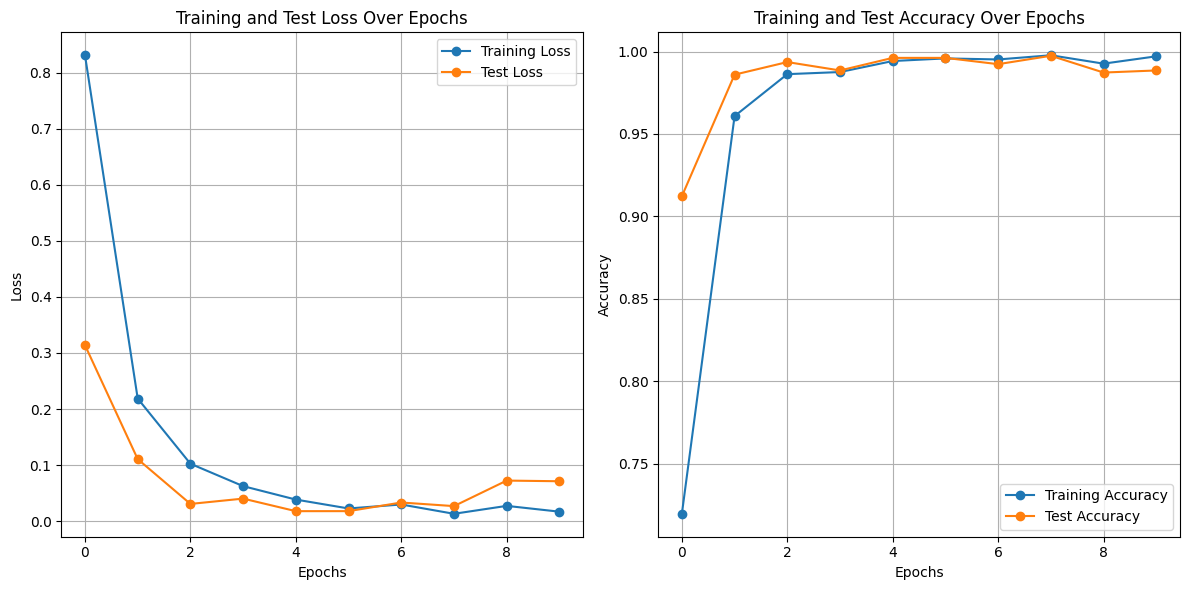

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Preprocessing
input_texts = df_a2d2['Content'].values
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df_a2d2['Domain'])

vocab_size = 10000
text_tokenizer = Tokenizer(num_words=vocab_size)
text_tokenizer.fit_on_texts(input_texts)
text_sequences = text_tokenizer.texts_to_sequences(input_texts)

sequence_max_length = 100
padded_texts = pad_sequences(text_sequences, maxlen=sequence_max_length)
categorical_labels = to_categorical(encoded_labels)

# Split the data into training and testing sets
train_inputs, test_inputs, train_labels, test_labels = train_test_split(
    padded_texts, categorical_labels, test_size=0.2, random_state=42
)

# Define model parameters
embedding_dim = 128
lstm_hidden_units = 64
num_classes = 5

# Create the model
classification_model = Sequential()
classification_model.add(Embedding(vocab_size, embedding_dim, input_length=sequence_max_length))
classification_model.add(LSTM(lstm_hidden_units, dropout=0.2, recurrent_dropout=0.2))
classification_model.add(Dense(32, activation='relu'))
classification_model.add(Dropout(0.5))
classification_model.add(Dense(num_classes, activation='softmax'))

# Compile the model
classification_model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Train the model and track history
batch_size = 32
num_epochs = 10

training_history = classification_model.fit(
    train_inputs, train_labels,
    batch_size=batch_size,
    epochs=num_epochs,
    validation_data=(test_inputs, test_labels)
)

# Plot training and test loss over epochs
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(training_history.history['loss'], 'o-', label='Training Loss')
plt.plot(training_history.history['val_loss'], 'o-', label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(training_history.history['accuracy'], 'o-', label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], 'o-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate on test data
score = model.evaluate(X_test, y_test)
print(f"Test accuracy: {score[1]:.4f}")

# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# classification report
from sklearn.metrics import classification_report
print(classification_report(true_classes, predicted_classes, 
                           target_names=encoder.classes_))


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9853 - loss: 0.0787
Test accuracy: 0.9898
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
               precision    recall  f1-score   support

Entertainment       0.99      0.99      0.99       146
   Healthcare       0.98      0.99      0.99       193
       Sports       0.96      0.99      0.97        73
   Technology       1.00      0.98      0.99       260
      Tourism       1.00      1.00      1.00       114

     accuracy                           0.99       786
    macro avg       0.99      0.99      0.99       786
 weighted avg       0.99      0.99      0.99       786

